In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [2]:
data_url='https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz'
dataset_path=tf.keras.utils.get_file("mnist.npg",data_url)

In [3]:
dataset_path

'C:\\Users\\personal\\.keras\\datasets\\mnist.npg'

In [4]:
with np.load(dataset_path) as data:
    x_train=data['x_train']
    y_train=data['y_train']
    x_test=data['x_test']
    y_test=data['y_test'] 

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
train_dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train))
test_dataset=tf.data.Dataset.from_tensor_slices((x_test,y_test))

In [7]:
train_dataset

<TensorSliceDataset shapes: ((28, 28), ()), types: (tf.uint8, tf.uint8)>

In [8]:
batch_size=32
buffer_size=100
train_dataset=train_dataset.shuffle(buffer_size).batch(batch_size)
test_dataset=test_dataset.batch(batch_size)

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10)])

In [10]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

In [11]:
model.fit(train_dataset,
          validation_data=test_dataset,
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.6568 - sparse_categorical_accuracy: 0.8679 - val_loss: 0.5769 - val_sparse_categorical_accuracy: 0.8817
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3037 - sparse_categorical_accuracy: 0.9258 - val_loss: 0.2573 - val_sparse_categorical_accuracy: 0.9384
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2086 - sparse_categorical_accuracy: 0.9427 - val_loss: 0.2359 - val_sparse_categorical_accuracy: 0.9430
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1698 - sparse_categorical_accuracy: 0.9527 - val_loss: 0.2063 - val_sparse_categorical_accuracy: 0.9469
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1472 - sparse_categorical_accuracy: 0.9585 - val_loss: 0.1818 - val_sparse_categorical_accuracy: 0.9567
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1342 - spars

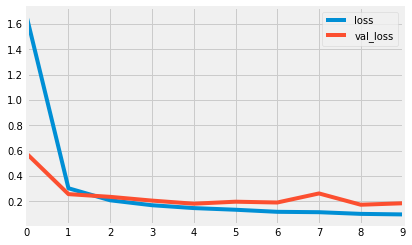

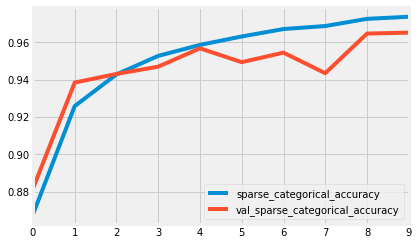

In [12]:
import pandas as pd
loss=pd.DataFrame(model.history.history)
loss.tail()
loss[["loss","val_loss"]].plot()
loss[["sparse_categorical_accuracy","val_sparse_categorical_accuracy"]].plot()

In [13]:
model.evaluate(test_dataset)

313/313 [==============================] - 0s 800us/step - loss: 0.1852 - sparse_categorical_accuracy: 0.9651


[0.18516193330287933, 0.9650999903678894]